In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
from keras.models import Sequential

/home/ranojoy/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
current_location = os.getcwd()
data_location = "data/"

In [3]:
fopen = open(data_location + "pattern.txt", "r")
patterns = fopen.read()
fopen.close()

In [4]:
patterns = patterns.split("\n")
patterns = patterns[:len(patterns) - 1]

In [5]:
patterns_final = []
for k in range(len(patterns)):
    if len(patterns[k]) == 10:
        patterns_final.append(patterns[k].upper())
        
print ("Given patterns :", len(patterns_final))

Given patterns : 82


In [6]:
data_prep = []
for k in range(len(patterns_final)):
    one = []
    for m in range(len(patterns_final[k])):
        one.append(ord(patterns_final[k][m]) - ord('A') + 1)
    data_prep.append(one)

In [7]:
print (data_prep[9], patterns_final[9])

[1, 2, 3, 3, 1, 2, 2, 3, 1, 2] ABCCABBCAB


In [8]:
input_ = []
target_ = []

input_size = 7

for k in range(len(data_prep)):
    for m in range(10 - input_size):
        input_.append(data_prep[k][m:input_size + m])
        target_.append(data_prep[k][input_size + m])

In [9]:
target = []

for k in range(len(target_)):
    a = [0] * 3
    a[target_[k] - 1] = 1
    target.append(a)

In [10]:
print (input_[0], target[0])
print (len(input_))

[1, 3, 2, 2, 3, 3, 1] [0, 1, 0]
246


In [11]:
trainX = input_[:int(len(input_) * 0.6)]
trainY = target[:int(len(target) * 0.6)]

validateX = input_[int(len(input_) * 0.6) : int(len(input_) * 0.8)]
validateY = target[int(len(target) * 0.6) : int(len(target) * 0.8)]

testX = input_[int(len(input_) * 0.8):]
testY = target[int(len(target) * 0.8):]

trainX = np.array(trainX)
trainY = np.array(trainY)
validateX = np.array(validateX)
validateY = np.array(validateY)
testX = np.array(testX)
testY = np.array(testY)

In [12]:
print (trainX[0], trainY[0], input_[0])

[1 3 2 2 3 3 1] [0 1 0] [1, 3, 2, 2, 3, 3, 1]


In [13]:
model = Sequential()

model.add(Dense(len(trainX[0]), input_dim = len(trainX[0]), activation='relu', kernel_initializer='normal'))
model.add(Dense(100, activation='relu', kernel_initializer='normal'))
model.add(Dense(3, activation='softmax'))

In [14]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
history = model.fit(trainX, trainY, epochs=250, batch_size=50, verbose=1, validation_data = (validateX, validateY), shuffle = True)

Train on 147 samples, validate on 49 samples
Epoch 1/250
147/147 [==============================] - 1s 4ms/step - loss: 1.0983 - acc: 0.3469 - val_loss: 1.0952 - val_acc: 0.3878
Epoch 2/250
147/147 [==============================] - 0s 111us/step - loss: 1.0975 - acc: 0.3469 - val_loss: 1.0943 - val_acc: 0.3878
Epoch 3/250
147/147 [==============================] - 0s 121us/step - loss: 1.0970 - acc: 0.3469 - val_loss: 1.0937 - val_acc: 0.3878
Epoch 4/250
147/147 [==============================] - 0s 209us/step - loss: 1.0965 - acc: 0.3469 - val_loss: 1.0932 - val_acc: 0.3878
Epoch 5/250
147/147 [==============================] - 0s 152us/step - loss: 1.0962 - acc: 0.3469 - val_loss: 1.0924 - val_acc: 0.3878
Epoch 6/250
147/147 [==============================] - 0s 140us/step - loss: 1.0954 - acc: 0.3469 - val_loss: 1.0918 - val_acc: 0.3878
Epoch 7/250
147/147 [==============================] - 0s 186us/step - loss: 1.0950 - acc: 0.3469 - val_loss: 1.0907 - val_acc: 0.3878
Epoch 8/250


Epoch 61/250
147/147 [==============================] - 0s 132us/step - loss: 0.9532 - acc: 0.4830 - val_loss: 0.9190 - val_acc: 0.5714
Epoch 62/250
147/147 [==============================] - 0s 90us/step - loss: 0.9511 - acc: 0.4898 - val_loss: 0.9171 - val_acc: 0.5918
Epoch 63/250
147/147 [==============================] - 0s 130us/step - loss: 0.9493 - acc: 0.4966 - val_loss: 0.9169 - val_acc: 0.5918
Epoch 64/250
147/147 [==============================] - 0s 98us/step - loss: 0.9466 - acc: 0.5034 - val_loss: 0.9150 - val_acc: 0.5918
Epoch 65/250
147/147 [==============================] - 0s 86us/step - loss: 0.9444 - acc: 0.5034 - val_loss: 0.9142 - val_acc: 0.5918
Epoch 66/250
147/147 [==============================] - 0s 121us/step - loss: 0.9421 - acc: 0.5170 - val_loss: 0.9115 - val_acc: 0.5918
Epoch 67/250
147/147 [==============================] - 0s 141us/step - loss: 0.9405 - acc: 0.5170 - val_loss: 0.9094 - val_acc: 0.6327
Epoch 68/250
147/147 [=============================

147/147 [==============================] - 0s 128us/step - loss: 0.8831 - acc: 0.5782 - val_loss: 0.8524 - val_acc: 0.6531
Epoch 122/250
147/147 [==============================] - 0s 169us/step - loss: 0.8831 - acc: 0.5510 - val_loss: 0.8542 - val_acc: 0.6531
Epoch 123/250
147/147 [==============================] - 0s 133us/step - loss: 0.8831 - acc: 0.5578 - val_loss: 0.8517 - val_acc: 0.6531
Epoch 124/250
147/147 [==============================] - 0s 127us/step - loss: 0.8824 - acc: 0.5646 - val_loss: 0.8526 - val_acc: 0.6531
Epoch 125/250
147/147 [==============================] - 0s 96us/step - loss: 0.8815 - acc: 0.5782 - val_loss: 0.8508 - val_acc: 0.6531
Epoch 126/250
147/147 [==============================] - 0s 137us/step - loss: 0.8812 - acc: 0.5578 - val_loss: 0.8504 - val_acc: 0.6531
Epoch 127/250
147/147 [==============================] - 0s 77us/step - loss: 0.8813 - acc: 0.5578 - val_loss: 0.8482 - val_acc: 0.6531
Epoch 128/250
147/147 [==============================] - 

Epoch 181/250
147/147 [==============================] - 0s 168us/step - loss: 0.8637 - acc: 0.5646 - val_loss: 0.8360 - val_acc: 0.5918
Epoch 182/250
147/147 [==============================] - 0s 121us/step - loss: 0.8627 - acc: 0.5782 - val_loss: 0.8352 - val_acc: 0.5918
Epoch 183/250
147/147 [==============================] - 0s 141us/step - loss: 0.8641 - acc: 0.5918 - val_loss: 0.8333 - val_acc: 0.6122
Epoch 184/250
147/147 [==============================] - 0s 131us/step - loss: 0.8637 - acc: 0.5850 - val_loss: 0.8348 - val_acc: 0.5918
Epoch 185/250
147/147 [==============================] - 0s 165us/step - loss: 0.8622 - acc: 0.5782 - val_loss: 0.8338 - val_acc: 0.5918
Epoch 186/250
147/147 [==============================] - 0s 133us/step - loss: 0.8620 - acc: 0.5850 - val_loss: 0.8334 - val_acc: 0.5918
Epoch 187/250
147/147 [==============================] - 0s 124us/step - loss: 0.8614 - acc: 0.5850 - val_loss: 0.8325 - val_acc: 0.5918
Epoch 188/250
147/147 [==================

Epoch 241/250
147/147 [==============================] - 0s 120us/step - loss: 0.8429 - acc: 0.5850 - val_loss: 0.8151 - val_acc: 0.6122
Epoch 242/250
147/147 [==============================] - 0s 101us/step - loss: 0.8438 - acc: 0.5714 - val_loss: 0.8164 - val_acc: 0.5918
Epoch 243/250
147/147 [==============================] - 0s 95us/step - loss: 0.8425 - acc: 0.5714 - val_loss: 0.8172 - val_acc: 0.6122
Epoch 244/250
147/147 [==============================] - 0s 165us/step - loss: 0.8414 - acc: 0.5782 - val_loss: 0.8172 - val_acc: 0.6327
Epoch 245/250
147/147 [==============================] - 0s 102us/step - loss: 0.8424 - acc: 0.5714 - val_loss: 0.8180 - val_acc: 0.6327
Epoch 246/250
147/147 [==============================] - 0s 150us/step - loss: 0.8417 - acc: 0.5850 - val_loss: 0.8158 - val_acc: 0.6327
Epoch 247/250
147/147 [==============================] - 0s 122us/step - loss: 0.8410 - acc: 0.5918 - val_loss: 0.8165 - val_acc: 0.6122
Epoch 248/250
147/147 [===================

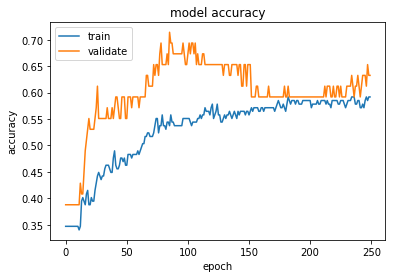

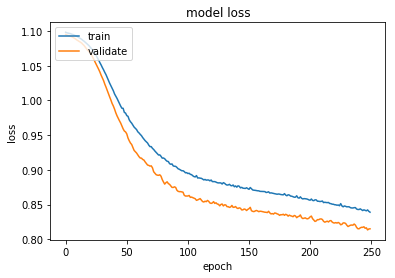

In [16]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')
plt.show()

In [17]:
scores_train = model.evaluate(trainX, trainY)
print("Train", "%s: %.2f%%" % (model.metrics_names[1], scores_train[1]*100))

scores_train = model.evaluate(validateX, validateY)
print("Train", "%s: %.2f%%" % (model.metrics_names[1], scores_train[1]*100))

scores_train = model.evaluate(testX, testY)
print("Train", "%s: %.2f%%" % (model.metrics_names[1], scores_train[1]*100))

147/147 [==============================] - 0s 108us/step
Train acc: 58.50%
49/49 [==============================] - 0s 243us/step
Train acc: 63.27%
50/50 [==============================] - 0s 164us/step
Train acc: 62.00%


In [18]:
predictions = model.predict(testX)
for k in range(len(testX)):
    a = [0]*3
    maxx = max(predictions[k])
    pos = 0
    for m in range(len(predictions[k])):
        if predictions[k][m] == maxx:
            pos = m
            break
    a[pos] = 1
    #print (predictions[k], " : ",  a, " : ",testY[k])
    print (a, " : ", list(testY[k]))

[0, 0, 1]  :  [0, 0, 1]
[1, 0, 0]  :  [1, 0, 0]
[1, 0, 0]  :  [1, 0, 0]
[0, 1, 0]  :  [0, 0, 1]
[1, 0, 0]  :  [0, 1, 0]
[1, 0, 0]  :  [1, 0, 0]
[0, 1, 0]  :  [0, 1, 0]
[0, 0, 1]  :  [0, 0, 1]
[0, 0, 1]  :  [1, 0, 0]
[0, 0, 1]  :  [0, 0, 1]
[1, 0, 0]  :  [0, 1, 0]
[0, 0, 1]  :  [0, 0, 1]
[1, 0, 0]  :  [1, 0, 0]
[0, 1, 0]  :  [0, 0, 1]
[0, 0, 1]  :  [0, 0, 1]
[1, 0, 0]  :  [0, 0, 1]
[1, 0, 0]  :  [0, 1, 0]
[1, 0, 0]  :  [0, 1, 0]
[1, 0, 0]  :  [1, 0, 0]
[0, 0, 1]  :  [0, 0, 1]
[1, 0, 0]  :  [0, 1, 0]
[1, 0, 0]  :  [0, 0, 1]
[1, 0, 0]  :  [1, 0, 0]
[0, 0, 1]  :  [0, 0, 1]
[1, 0, 0]  :  [1, 0, 0]
[0, 1, 0]  :  [0, 1, 0]
[1, 0, 0]  :  [0, 0, 1]
[1, 0, 0]  :  [1, 0, 0]
[0, 1, 0]  :  [0, 1, 0]
[0, 0, 1]  :  [0, 0, 1]
[0, 0, 1]  :  [0, 0, 1]
[1, 0, 0]  :  [0, 1, 0]
[1, 0, 0]  :  [0, 1, 0]
[1, 0, 0]  :  [1, 0, 0]
[0, 1, 0]  :  [0, 0, 1]
[0, 0, 1]  :  [0, 1, 0]
[0, 0, 1]  :  [0, 0, 1]
[1, 0, 0]  :  [0, 1, 0]
[0, 0, 1]  :  [0, 0, 1]
[1, 0, 0]  :  [1, 0, 0]
[0, 1, 0]  :  [0, 1, 0]
[1, 0, 0]  :  [1

In [19]:
sequence = ['A', 'C', 'A', 'B', 'C', 'B', 'A']

sqd = []
for k in range(len(sequence)):
    sqd.append(ord(sequence[k]) - ord('A') + 1)

predictions = model.predict(np.array([sqd])) 

a = [0]*3
maxx = max(predictions[0])
pos = 0
for m in range(len(predictions[0])):
    if predictions[0][m] == maxx:
        pos = m
        break
a[pos] = 1

print (sqd, a)

if a[0] == 1:
    print ('A')
elif a[1] == 1:
    print ('B')
else:
    print ('C')

[1, 3, 1, 2, 3, 2, 1] [0, 1, 0]
B


In [20]:
model_json = model.to_json()
with open("model/model_8th.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model/model_8th.h5")
print("Saved model to disk")

Saved model to disk
